## Lab 01. Poetry generation

Let's try to generate some poetry using RNNs. 

You have several choices here: 

* The Shakespeare sonnets, file `sonnets.txt` available in the notebook directory.

* Роман в стихах "Евгений Онегин" Александра Сергеевича Пушкина. В предобработанном виде доступен по [ссылке](https://github.com/attatrol/data_sources/blob/master/onegin.txt).

* Some other text source, if it will be approved by the course staff.

Text generation can be designed in several steps:
    
1. Data loading.
2. Dictionary generation.
3. Data preprocessing.
4. Model (neural network) training.
5. Text generation (model evaluation).


In [79]:
import string
import os

### Data loading: Shakespeare

Shakespeare sonnets are awailable at this [link](http://www.gutenberg.org/ebooks/1041?msg=welcome_stranger). In addition, they are stored in the same directory as this notebook (`sonnetes.txt`). Simple preprocessing is already done for you in the next cell: all technical info is dropped.

In opposite to the in-class practice, this time we want to predict complex text. Let's reduce the complexity of the task and lowercase all the symbols.

Now variable `text` is a list of strings. Join all the strings into one and lowercase it.

### Data loading: "Евгений Онегин"


In [80]:
!wget https://raw.githubusercontent.com/attatrol/data_sources/master/onegin.txt
    
with open('onegin.txt', 'r') as iofile:
    text = iofile.readlines()
    
text = [x.replace('\t\t', '') for x in text]

--2021-04-22 14:58:48--  https://raw.githubusercontent.com/attatrol/data_sources/master/onegin.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 262521 (256K) [text/plain]
Saving to: ‘onegin.txt.9’

onegin.txt.9        100%[===================>] 256,37K  --.-KB/s    in 0,1s    

2021-04-22 14:58:49 (2,12 MB/s) - ‘onegin.txt.9’ saved [262521/262521]



In opposite to the in-class practice, this time we want to predict complex text. Let's reduce the complexity of the task and lowercase all the symbols.

Now variable `text` is a list of strings. Join all the strings into one and lowercase it.

In [81]:
import re 

def is_good(text):
    return bool(re.search('[а-яА-Я]', text)) or text==' ' or text=='\n'

In [82]:
text

['\n',
 'I\n',
 '\n',
 '«Мой дядя самых честных правил,\n',
 'Когда не в шутку занемог,\n',
 'Он уважать себя заставил\n',
 'И лучше выдумать не мог.\n',
 'Его пример другим наука;\n',
 'Но, боже мой, какая скука\n',
 'С больным сидеть и день и ночь,\n',
 'Не отходя ни шагу прочь!\n',
 'Какое низкое коварство\n',
 'Полуживого забавлять,\n',
 'Ему подушки поправлять,\n',
 'Печально подносить лекарство,\n',
 'Вздыхать и думать про себя:\n',
 'Когда же черт возьмет тебя!»\n',
 '\n',
 '\n',
 '\n',
 'II\n',
 '\n',
 'Так думал молодой повеса,\n',
 'Летя в пыли на почтовых,\n',
 'Всевышней волею Зевеса\n',
 'Наследник всех своих родных. —\n',
 'Друзья Людмилы и Руслана!\n',
 'С героем моего романа\n',
 'Без предисловий, сей же час\n',
 'Позвольте познакомить вас:\n',
 'Онегин, добрый мой приятель,\n',
 'Родился на брегах Невы,\n',
 'Где, может быть, родились вы\n',
 'Или блистали, мой читатель;\n',
 'Там некогда гулял и я:\n',
 'Но вреден север для меня\n',
 '\n',
 '\n',
 'III\n',
 '\n',
 'Сл

In [83]:
text = ''.join(text)

In [84]:
text = text.replace('\n',' ',)

In [85]:
out = ''.join([x for x in text if is_good(x)])

Put all the characters, that you've seen in the text, into variable `tokens`.

In [86]:
tokens = sorted(set(out))

Create dictionary `token_to_idx = {<char>: <index>}` and dictionary `idx_to_token = {<index>: <char>}`

In [87]:
# dict <index>:<char>
# Your great code here
token_to_idx ={v:k for k,v in enumerate(tokens)}

# dict <char>:<index>
# Your great code here
idx_to_token = {v:k for k,v in token_to_idx.items() }

In [88]:
idx_to_token

{0: ' ',
 1: 'А',
 2: 'Б',
 3: 'В',
 4: 'Г',
 5: 'Д',
 6: 'Е',
 7: 'Ж',
 8: 'З',
 9: 'И',
 10: 'К',
 11: 'Л',
 12: 'М',
 13: 'Н',
 14: 'О',
 15: 'П',
 16: 'Р',
 17: 'С',
 18: 'Т',
 19: 'У',
 20: 'Ф',
 21: 'Х',
 22: 'Ц',
 23: 'Ч',
 24: 'Ш',
 25: 'Э',
 26: 'Ю',
 27: 'Я',
 28: 'а',
 29: 'б',
 30: 'в',
 31: 'г',
 32: 'д',
 33: 'е',
 34: 'ж',
 35: 'з',
 36: 'и',
 37: 'й',
 38: 'к',
 39: 'л',
 40: 'м',
 41: 'н',
 42: 'о',
 43: 'п',
 44: 'р',
 45: 'с',
 46: 'т',
 47: 'у',
 48: 'ф',
 49: 'х',
 50: 'ц',
 51: 'ч',
 52: 'ш',
 53: 'щ',
 54: 'ъ',
 55: 'ы',
 56: 'ь',
 57: 'э',
 58: 'ю',
 59: 'я'}

*Comment: in this task we have only 38 different tokens, so let's use one-hot encoding.*

### Building the model

Now we want to build and train recurrent neural net which would be able to something similar to Shakespeare's poetry.

Let's use vanilla RNN, similar to the one created during the lesson.

In [89]:
import os
from IPython.display import clear_output
from random import sample

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.tensorboard import SummaryWriter
from torch.utils.data import Dataset, DataLoader
from  tqdm import tqdm

In [90]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [91]:
class MyDataset(Dataset):
  
    def __init__(self, string,token_to_idx,size=200):
       
        self.string = string
        self.token_to_idx=token_to_idx
        self.size=size

    def __len__(self):
        return len(self.string)

    def __getitem__(self, idx):
        random_index = np.random.randint(0, len(self.string)-self.size)
        buf = [self.token_to_idx[x] for x in self.string[random_index:random_index+self.size]]
        x = torch.tensor([x for x in buf[:-1]])
        y=  torch.tensor([x for x in buf[1:]])

        return x,y


In [92]:
dataset = MyDataset(out,token_to_idx)
dataloader = DataLoader(dataset, batch_size=128,
                      shuffle=True, num_workers=2)

In [93]:
class MyModel(nn.Module):
    def __init__(self, num_tokens=len(idx_to_token), emb_size=100, rnn_num_units=100):
        super(self.__class__, self).__init__()
        self.emb = nn.Embedding(num_tokens, emb_size)
        self.rnn = nn.RNN(emb_size, rnn_num_units)
        self.hid_to_logits = nn.Linear(rnn_num_units, num_tokens)

    def forward(self, x,hidden=None):
        out =self.emb(x)
        out, hid = self.rnn(out,hidden)
        out = self.hid_to_logits(out)
        
        return out,hid

In [94]:
model = MyModel()
opt = torch.optim.Adam(model.parameters())
criterion = nn.CrossEntropyLoss()
history = []
EPOCHS=40

In [95]:
writer = SummaryWriter()
for x,y in dataloader:
    x = x.permute(1,0)
    x=x.to(device)
    y=y.to(device)

  
    writer.add_graph(model.to(device), x)
    break

In [96]:
def generate_sample(char_rnn, seed_phrase=' привет', max_length=32, temperature=1.0):
    '''
    ### Disclaimer: this is an example function for text generation.
    ### You can either adapt it in your code or create your own function
    
    The function generates text given a phrase of length at least SEQ_LENGTH.
    :param seed_phrase: prefix characters. The RNN is asked to continue the phrase
    :param max_length: maximum output length, including seed_phrase
    :param temperature: coefficient for sampling.  higher temperature produces more chaotic outputs, 
        smaller temperature converges to the single most likely output.
        
    Be careful with the model output. This model waits logits (not probabilities/log-probabilities)
    of the next symbol.
    '''
    char_rnn.eval()
    x_sequence = [[token_to_idx[token]] for token in seed_phrase]
    x_sequence = torch.tensor(x_sequence, dtype=torch.int64).to(device)

    hidden=None
    for i in range(len(seed_phrase) - 1):
        out,hidden = char_rnn(x_sequence[i].view(1,1),hidden)

    for _ in range(max_length - len(seed_phrase)):

        out,hidden = char_rnn(x_sequence[-1].view(1,1).to(device),hidden)

        p_next = F.softmax(out.cpu() / temperature,dim=-1).data.numpy()[0][0]

        next_ix = np.random.choice(len(tokens), p=p_next)
        next_ix = torch.tensor([[next_ix]], dtype=torch.int64)
        x_sequence = torch.cat([x_sequence.cpu(), next_ix], dim=0)
        
    return ''.join([tokens[ix] for ix in x_sequence.data.numpy().flatten()])

In [97]:
model.to(device)
model.train()
for i in tqdm(range(EPOCHS)):
    model.train()
    loss_sum=0
    for x,y in dataloader:
      
        x = x.permute(1,0)
        x=x.to(device)
        y=y.to(device)

        answer,hidden = model(x,None)
        answer=answer.permute(1,2,0)

        loss = criterion(answer,y)

        loss.backward()

        opt.step()
        opt.zero_grad()
        loss_sum+=loss.cpu().data.numpy()
    mean_loss = loss_sum/len(dataloader)
    history.append(mean_loss)
  
    writer.add_scalar("train loss", mean_loss, i)
    writer.add_text( 'Generated sample',"This is text {}".format(generate_sample(model,max_length=64, temperature=0.5,seed_phrase=' давид')), global_step=i)
  

100%|██████████| 40/40 [10:38<00:00, 15.96s/it]


Plot the loss function (axis X: number of epochs, axis Y: loss function).

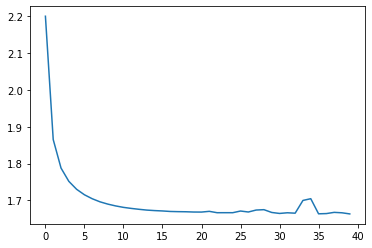

In [98]:
plt.plot([i for i in range(len(history))],history);

### More poetic model

Let's use LSTM instead of vanilla RNN and compare the results.

In [99]:
class MyModel(nn.Module):
    def __init__(self, num_tokens=len(idx_to_token), emb_size=100, rnn_num_units=300):
        super(self.__class__, self).__init__()
        self.emb = nn.Embedding(num_tokens, emb_size)
        self.rnn = nn.LSTM(emb_size, rnn_num_units)
        self.hid_to_logits = nn.Linear(rnn_num_units, num_tokens)

    def forward(self, x,hidden=None):
        out =self.emb(x)
        out, hid = self.rnn(out,hidden)
        out = self.hid_to_logits(out)
        
        return out,hid

In [100]:
model = MyModel()
opt = torch.optim.Adam(model.parameters())
criterion = nn.CrossEntropyLoss()
history = []
EPOCHS=200

In [101]:
writer = SummaryWriter()

In [102]:
model.to(device)
model.train()
for i in tqdm(range(EPOCHS)):
    model.train()
    loss_sum=0
    for x,y in dataloader:
      
        x = x.permute(1,0)
        x=x.to(device)
        y=y.to(device)

        answer,hidden = model(x,None)
        answer=answer.permute(1,2,0)

        loss = criterion(answer,y)

        loss.backward()

        opt.step()
        opt.zero_grad()
        loss_sum+=loss.cpu().data.numpy()
    mean_loss = loss_sum/len(dataloader)
    history.append(mean_loss)
  
    writer.add_scalar("train loss", mean_loss, i)
    writer.add_text( 'Generated sample',"This is text {}".format(generate_sample(model,max_length=64, temperature=0.5,seed_phrase=' давид')), global_step=i)
  

 17%|█▋        | 34/200 [48:46<3:58:06, 86.07s/it]


KeyboardInterrupt: 

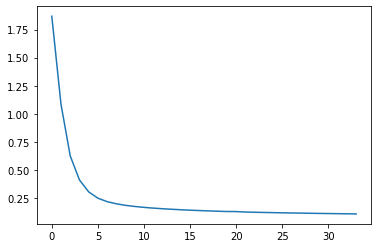

In [103]:
plt.plot([i for i in range(len(history))],history);

In [104]:
generate_sample(model,max_length=400, temperature=0.1,seed_phrase='таня ')

'таня муза      Она любила Ричардсона Не потому чтобы прочла Не потому чтоб Грандисона Она Ловласу предпочла Но в старину княжна Алина Ее московская кузина Твердила часто ей об них В то время был еще жених Ее супруг но по неволе Она вздыхала о другом Который сердцем и умом Ей нравился гораздо боле Сей Грандисон был славный франт Игрок и гвардии сержант      Как он она была одета Всегда тото был на '

Generate text using the trained net with different `temperature` parameter: `[0.1, 0.2, 0.5, 1.0, 2.0]`.

Evaluate the results visually, try to interpret them.

In [105]:
for temperature  in [0.1, 0.2, 0.5, 1.0, 2.0]:
    print(temperature)
    print(generate_sample(model,max_length=400, temperature=temperature,seed_phrase='таня '))

0.1
таня про добрый мадригая Довольно ль девы молодой      Еще бокалов жажда просит Залить горячий жир котлет Но звон брегета им доносит Что новый начался балет Театра злой законодатель Непостоянный обожатель Очаровательных актрис Почетный гражданин кулис Онегин полетел к театру Где каждый вольностью дыша Готов охлопать  Обшикать Федру Клеопатру Моину вызвать для того Чтоб только слышали его      Волш
0.2
таня пред собой Владимир книгуряй благор Плоды негине видят слушай А марине в двух друга Да стада и солканья Во всех печалях ей дарит И безотлучно с нею спит      Ее тревожит сновиденье Не зная как его понять Мечтанья страшного значенье Татьяна хочет отыскать Татьяна в оглавленье кратком Находит азбучным порядком Слова бор буря ведьма ель Еж мрак мосток медведь метель И прочая Ее сомнений Мартын З
0.5
таня предостор Несносне наконец очарье Но тем умил и другие сердцем он Питренье весель То солнце краткий сад герой Готов был жертвовать собой И при конце последней части хладность Предме

### Saving and loading models

Save the model to the disk, then load it and generate text. Examples are available [here](https://pytorch.org/tutorials/beginner/saving_loading_models.html]).

In [106]:
PATH='./my_best_model_1.model'

In [107]:
torch.save(model.state_dict(),PATH )

In [108]:
model  = MyModel()
model.load_state_dict(torch.load(PATH))
model.eval()
model.to(device)

MyModel(
  (emb): Embedding(60, 100)
  (rnn): LSTM(100, 300)
  (hid_to_logits): Linear(in_features=300, out_features=60, bias=True)
)

In [117]:
print(generate_sample(model,max_length=400, temperature=0.3,seed_phrase='костя молодец '))

костя молодец Являла про день на язык чугах      Татьяна с ключницей простилась За воротами Через день Уж утром рано вновь явилась Она в оставленную сень И в молчаливом кабинете Ему припомнилась пора Когда жестокая хандра За ним гналася в шумном свете Поймала за ворот взяла И в темный угол заперла      Стал вновь читать он без разбора Прочел он Гиббона Руссо Манзони Гердера Шамфора    Биша Тиссо П


### References
1. <a href='http://karpathy.github.io/2015/05/21/rnn-effectiveness/'> Andrew Karpathy blog post about RNN. </a> 
There are several examples of genration: Shakespeare texts, Latex formulas, Linux Sourse Code and children names.
2. <a href='https://github.com/karpathy/char-rnn'> Repo with char-rnn code </a>
3. Cool repo with PyTorch examples: [link](https://github.com/spro/practical-pytorch`)